In [1]:
import sys

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

sys.path.append('..')

from src.models.url_ml_catboost_classifier import SingletonURLMLCatBoostClassifier
from src.models.url_ml_desicion_tree_classifier import (
    SingletonURLMLDecisionTreeClassifier,
)
from src.models.url_ml_gradient_boosting_classifier import (
    SingletonURLMLGradientBoostingClassifier,
)
from src.models.url_ml_knn_classifier import SingletonURLMLKNNClassifier
from src.models.url_ml_logistic_regression_classifier import (
    SingletonURLMLLogisticRegressionClassifier,
)
from src.models.url_ml_mlp_classifier import SingletonURLMLMLPClassifier
from src.models.url_ml_naive_bayes_classifier import SingletonURLMLNaiveBayesClassifier
from src.models.url_ml_random_forest import SingletonURLMLRandomForestClassifier
from src.models.url_ml_svm_classifier import SingletonURLMLSVMClassifier
from src.utils.url_utils import load_data_from_csv


def evaluate_classifiers(classifiers, X_train, Y_train, X_test, Y_test, is_training):
    accuracies = []
    f1_scores = []
    recalls = []
    precisions = []
    
    for classifier in classifiers:
        if is_training:
            classifier.train(X_train.copy(), Y_train.copy())
            classifier.save()
        else:
            classifier.load()

        print(f"Evaluating {classifier.model_name}...")
        Y_pred = classifier.predict(X_test.copy())
        
        accuracy = accuracy_score(Y_test.copy(), Y_pred)
        f1 = f1_score(Y_test.copy(), Y_pred, average='weighted')
        recall = recall_score(Y_test.copy(), Y_pred, average='weighted')
        precision = precision_score(Y_test.copy(), Y_pred, average='weighted')
        
        print(f"Accuracy: {accuracy}")
        print(f"F1 Score: {f1}")
        print(f"Recall: {recall}")
        print(f"Precision: {precision}")
        
        accuracies.append(accuracy * 100)
        f1_scores.append(f1 * 100)
        recalls.append(recall * 100)
        precisions.append(precision * 100)
    
    return accuracies, f1_scores, recalls, precisions

def plot_metrics(model_names, accuracies, f1_scores, recalls, precisions):
    metrics_df = pd.DataFrame({
        'Model': model_names,
        'Accuracy (%)': accuracies,
        'F1 Score (%)': f1_scores,
        'Recall (%)': recalls,
        'Precision (%)': precisions
    })
    display(metrics_df)

def plot_accuracies(model_names, accuracies):
    plt.figure(figsize=(12, 6))
    plt.bar(model_names, accuracies)
    plt.xlabel("Model")
    plt.ylabel("Accuracy (%)")
    plt.title("Model Comparison")
    for i, accuracy in enumerate(accuracies):
        plt.text(i, accuracy + 1, f"{accuracy:.2f}%", ha="center", va="bottom")
    plt.show()

c:\Users\x\Documents\Github\spam-sms-detector-1123\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Evaluating svm...
Accuracy: 0.9642695612844867
F1 Score: 0.9642074624721793
Recall: 0.9642695612844867
Precision: 0.9644836492759153
0:	learn: 0.5487232	total: 113ms	remaining: 1m 52s
1:	learn: 0.4349357	total: 116ms	remaining: 58.1s
2:	learn: 0.3609236	total: 120ms	remaining: 39.8s
3:	learn: 0.3050829	total: 123ms	remaining: 30.7s
4:	learn: 0.2766620	total: 127ms	remaining: 25.2s
5:	learn: 0.2475476	total: 130ms	remaining: 21.6s
6:	learn: 0.2286637	total: 133ms	remaining: 18.9s
7:	learn: 0.2138754	total: 137ms	remaining: 17s
8:	learn: 0.2013643	total: 141ms	remaining: 15.5s
9:	learn: 0.1896378	total: 145ms	remaining: 14.3s
10:	learn: 0.1819539	total: 148ms	remaining: 13.3s
11:	learn: 0.1767867	total: 151ms	remaining: 12.5s
12:	learn: 0.1727735	total: 155ms	remaining: 11.7s
13:	learn: 0.1682578	total: 158ms	remaining: 11.1s
14:	learn: 0.1641759	total: 161ms	remaining: 10.6s
15:	learn: 0.1614218	total: 165ms	remaining: 10.2s
16:	learn: 0.1558968	total: 169ms	remaining: 9.78s
17:	learn: 

,Model,Accuracy (%),F1 Score (%),Recall (%),Precision (%)
0,svm,96.426956,96.420746,96.426956,96.448365
1,catboost,97.241067,97.238377,97.241067,97.247380


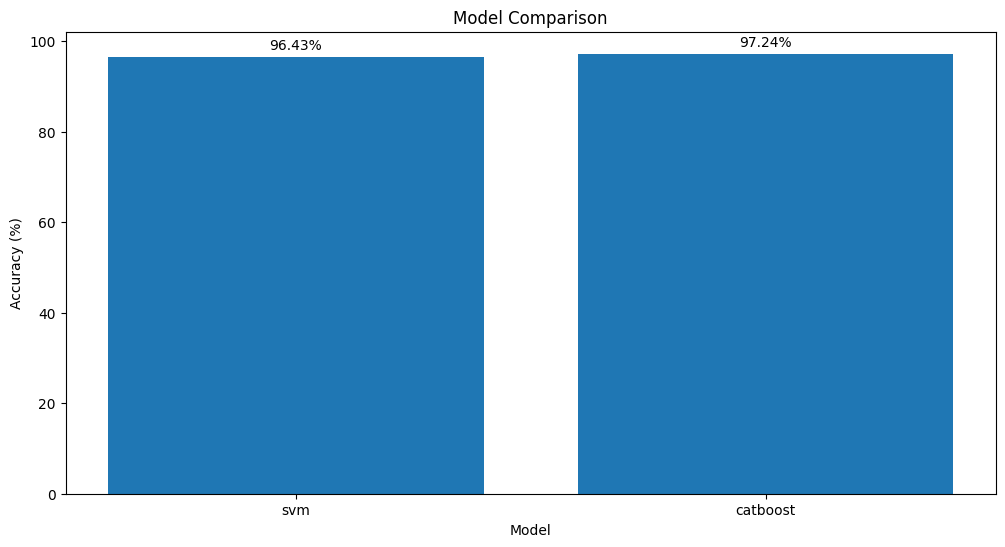

In [2]:
URL_CSV_PATH = "../data/url-data.csv"
MODEL_DIR = "../trained_models"
IS_TRAINING = True

classifiers = [
    SingletonURLMLSVMClassifier(MODEL_DIR),
    # SingletonURLMLRandomForestClassifier(MODEL_DIR),
    # SingletonURLMLLogisticRegressionClassifier(MODEL_DIR),
    # SingletonURLMLKNNClassifier(MODEL_DIR),
    # SingletonURLMLGradientBoostingClassifier(MODEL_DIR),
    SingletonURLMLCatBoostClassifier(MODEL_DIR),
    # SingletonURLMLDecisionTreeClassifier(MODEL_DIR),
    # SingletonURLMLMLPClassifier(MODEL_DIR),
    # SingletonURLMLNaiveBayesClassifier(MODEL_DIR),
]
model_names = [classifier.model_name for classifier in classifiers]

X, Y = load_data_from_csv(URL_CSV_PATH)
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)
accuracies = evaluate_classifiers(
    classifiers, X_train, Y_train, X_test, Y_test, IS_TRAINING
)

plot_metrics(model_names, *accuracies)

plot_accuracies(model_names, accuracies[0])